In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
train_path = r'data\train'
test_path = r'data\test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path, target_size=(64,64), class_mode='categorical', batch_size=5,shuffle=True)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path, target_size=(64,64), class_mode='categorical', batch_size=5, shuffle=True)

imgs, labels = next(train_batches)

Found 12024 images belonging to 24 classes.
Found 2400 images belonging to 24 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


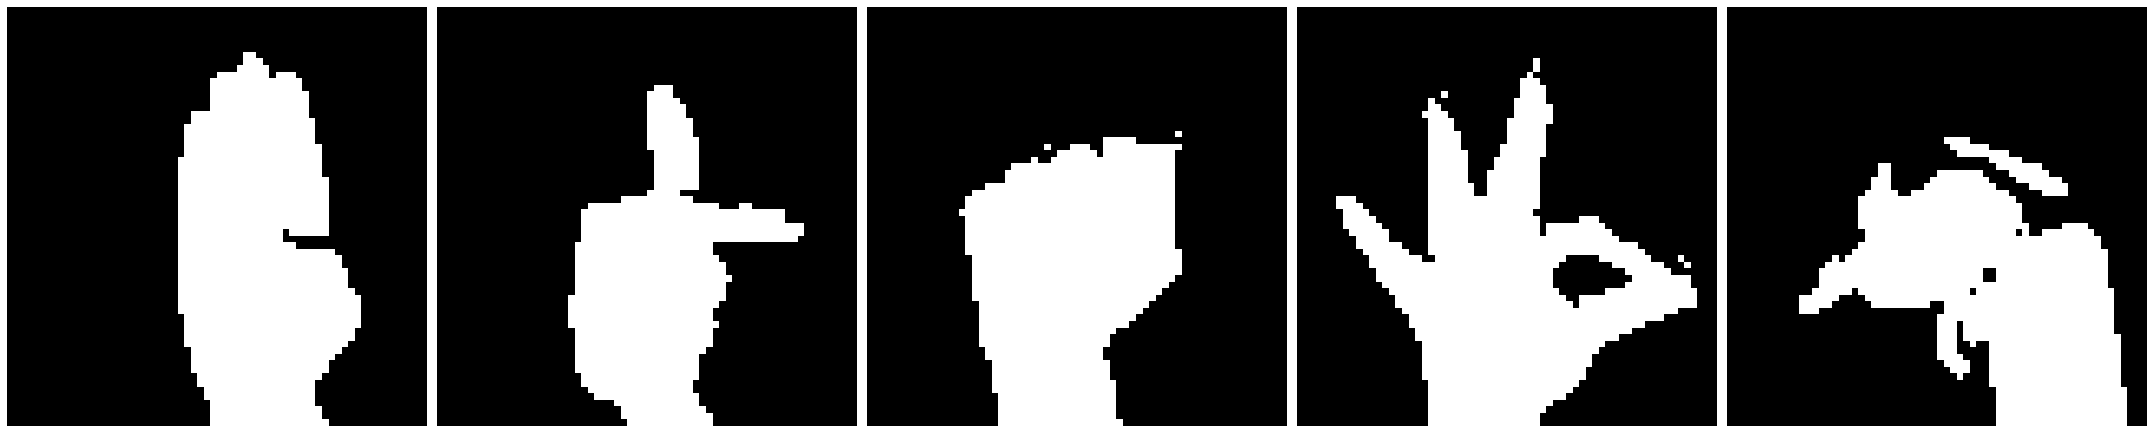

(5, 64, 64, 3)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
#Plotting the images...
import matplotlib.pyplot as plt
classes = len(labels[0])
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


plotImages(imgs)
print(imgs.shape)
print(labels)

In [8]:
model = Sequential() #initialising a sequential model to store layers of tensors

'''Keras Conv2D is a 2D Convolution Layer, this layer creates a convolution kernel that is wind with layers input 
which helps produce a tensor of outputs.

Kernel: In image processing kernel is a convolution matrix or a mask which can be used for blurring, 
sharpening, embossing, edge detection, and more by doing a convolution between a kernel and an image.'''

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.2))
model.add(Dense(128,activation ="relu"))
#model.add(Dropout(0.3))
model.add(Dense(classes,activation ="softmax"))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.005), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

history2 = model.fit(train_batches, epochs=6, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


### Finalised experiments:

In [10]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

history2 = model.fit(train_batches, epochs=6, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


Epoch 1/6
1203/1203 [==============================] - 326s 271ms/step - loss: 0.2218 - accuracy: 0.9618 - val_loss: 0.3758 - val_accuracy: 0.9371
Epoch 2/6
1203/1203 [==============================] - 65s 54ms/step - loss: 0.0878 - accuracy: 0.9837 - val_loss: 0.7718 - val_accuracy: 0.9125
Epoch 3/6
1203/1203 [==============================] - 70s 58ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.1368 - val_accuracy: 0.9567
Epoch 4/6
1203/1203 [==============================] - 70s 58ms/step - loss: 4.4047e-04 - accuracy: 1.0000 - val_loss: 0.1337 - val_accuracy: 0.9621
Epoch 5/6
1203/1203 [==============================] - 73s 61ms/step - loss: 3.2032e-04 - accuracy: 1.0000 - val_loss: 0.1273 - val_accuracy: 0.9658
Epoch 6/6
1203/1203 [==============================] - 68s 56ms/step - loss: 6.3842e-05 - accuracy: 1.0000 - val_loss: 0.1281 - val_accuracy: 0.9642
loss of 0.0025481190532445908; accuracy of 100.0%


In [12]:
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history2 = model.fit(train_batches, epochs=6, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

Epoch 1/6
1203/1203 [==============================] - 63s 52ms/step - loss: 0.3119 - accuracy: 0.9384 - val_loss: 0.0695 - val_accuracy: 0.9729
Epoch 2/6
1203/1203 [==============================] - 67s 56ms/step - loss: 0.0024 - accuracy: 0.9998 - val_loss: 0.0956 - val_accuracy: 0.9658
Epoch 3/6
1203/1203 [==============================] - 67s 56ms/step - loss: 9.5415e-04 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 0.9671
loss of 0.0018245566170662642; accuracy of 100.0%


In [15]:
from keras.optimizers import Adagrad
model1 = tf.keras.models.clone_model(
    model, input_tensors=None, clone_function=None
)
model1.compile(optimizer=Adagrad(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history2 = model1.fit(train_batches, epochs=6, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model1.evaluate(imgs, labels, verbose=0)
print(f'{model1.metrics_names[0]} of {scores[0]}; {model1.metrics_names[1]} of {scores[1]*100}%')

Epoch 1/6
1203/1203 [==============================] - 61s 51ms/step - loss: 0.2836 - accuracy: 0.9456 - val_loss: 0.1660 - val_accuracy: 0.9538
Epoch 2/6
1203/1203 [==============================] - 66s 55ms/step - loss: 0.0048 - accuracy: 0.9993 - val_loss: 0.1503 - val_accuracy: 0.9513
Epoch 3/6
1203/1203 [==============================] - 66s 55ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.1345 - val_accuracy: 0.9571
Epoch 4/6
1203/1203 [==============================] - 66s 55ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.1277 - val_accuracy: 0.9571
Epoch 5/6
1203/1203 [==============================] - 66s 55ms/step - loss: 8.2463e-04 - accuracy: 1.0000 - val_loss: 0.1243 - val_accuracy: 0.9583
Epoch 6/6
1203/1203 [==============================] - 67s 55ms/step - loss: 6.2254e-04 - accuracy: 1.0000 - val_loss: 0.1265 - val_accuracy: 0.9579
loss of 0.0007578865042887628; accuracy of 100.0%


In [5]:
model.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0005)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')


history2 = model.fit(train_batches, epochs=10, callbacks=[reduce_lr, early_stop],  validation_data = test_batches)#, checkpoint])
imgs, labels = next(train_batches) # For getting next batch of imgs...

imgs, labels = next(test_batches) # For getting next batch of imgs...
scores = model.evaluate(imgs, labels, verbose=0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

Epoch 1/10
1203/1203 [==============================] - 343s 285ms/step - loss: 0.3556 - accuracy: 0.9120 - val_loss: 0.2789 - val_accuracy: 0.9388
Epoch 2/10
1203/1203 [==============================] - 66s 55ms/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.2649 - val_accuracy: 0.9429
Epoch 3/10
1203/1203 [==============================] - 68s 56ms/step - loss: 6.0521e-04 - accuracy: 1.0000 - val_loss: 0.2620 - val_accuracy: 0.9429
Epoch 4/10
1203/1203 [==============================] - 73s 61ms/step - loss: 3.9687e-04 - accuracy: 1.0000 - val_loss: 0.2694 - val_accuracy: 0.9421
Epoch 5/10
1203/1203 [==============================] - 76s 63ms/step - loss: 3.0564e-04 - accuracy: 1.0000 - val_loss: 0.2663 - val_accuracy: 0.9429
loss of 0.02056077867746353; accuracy of 100.0%


In [6]:
#model.save('cse4020_CNN.h5')